# TITANIC ML Problem

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# Import Dataset & unify 'train' & 'test' datasets to make same features on both

In [2]:
#fetchin datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25  

In [6]:
test.info

<bound method DataFrame.info of      PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903    

In [7]:
#Let's make one table of these 2 datasets
td = pd.concat([train, test], ignore_index= True, sort= False)

In [8]:
td.info

<bound method DataFrame.info of       PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
5               6       0.0       3   
6               7       0.0       1   
7               8       0.0       3   
8               9       1.0       3   
9              10       1.0       2   
10             11       1.0       3   
11             12       1.0       1   
12             13       0.0       3   
13             14       0.0       3   
14             15       0.0       3   
15             16       1.0       2   
16             17       0.0       3   
17             18       1.0       2   
18             19       0.0       3   
19             20       1.0       3   
20             21       0.0       2   
21             22       1.0       2   
22             23       1.0       3   
23             24       1.0     

# Eploring Data :
# Missing Data

In [9]:
#Missing Values
td.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

'Survivied' : Has just 418 out of 1309 and that means it is in just test part of the data set, train part doesn't have missing value
'Age' : Has 218
'Fare' : Has 1 missing value
'Cabin' : Has 1014 out of 1309, we can omit this feature because it has too many missing values

Text(0.5, 1.0, 'Missing Values')

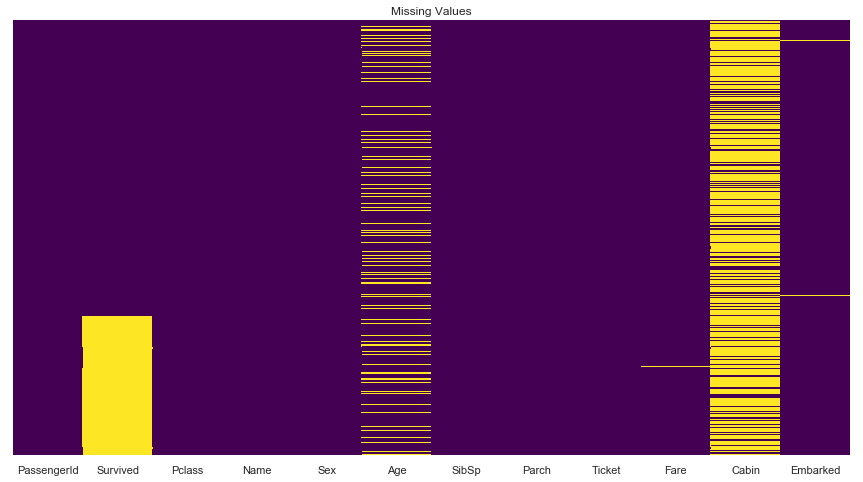

In [10]:
#Graph of missing values
#set size 
sns.set(rc = {'figure.figsize':(15,8)})
#set attributes and draw
sns.heatmap(td.isnull(), yticklabels= False, cbar= False, cmap= 'viridis').set_title("Missing Values")

In [11]:
#type of the dataset:
td.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# we should care of features that are in type of 'object' , if they're used in prediction and convert them into numerics

In [12]:
#Categorical vs. NONE-Categorical fields
td.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [13]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

as we see there are some categorical features, let's explore them to finding which gategories they have:

In [14]:
td.Survived.unique()

array([ 0.,  1., nan])

'Survived' contains : 0 -> Not Survived, 1 -> Survived, NaN for test part of the dataset

In [15]:
td.Pclass.unique()

array([3, 1, 2], dtype=int64)

'Pclass' contains 3 category as : 1, 2, 3

In [16]:
td.Sex.unique()

array(['male', 'female'], dtype=object)

'Sex' has 2 categories: 'male', 'female'

In [17]:
td.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

'SibSp' (siblings or spouses) cantains 7 categories : 1, 0, 3, 4, 2, 5, 8

In [18]:
td.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

'Parch' (Parent OR Children) has 8 categories as : 0, 1, 2, 5, 3, 4, 6, 9

# we use these 2 features to making new feature as : 'Family' and this means if the passenger has company on his/her journy , or travels alone.

In [19]:
td.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

'Embarked' has 3 categories as : 'S', 'C', 'Q' that is the port name where the passenger entered the ship , and the NaN is for that 1 missing data of this feature.

# Let's have som visualisation on data:

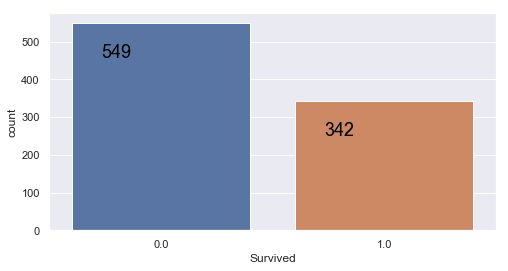

In [20]:
#Exploring Features
# 1- Survived
sns.set(rc = {'figure.figsize':(8,4)})
ax = sns.countplot(x=td['Survived'], order= td['Survived'].value_counts(ascending=False).index)
#show counts on graph
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=18)

as we see 342 out of 891 passengers are survived. it is %38 of the passengers.
%62 died.

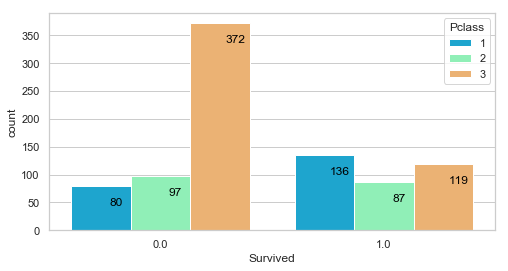

In [21]:
#Survived in Pclass
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived', data= td, hue= 'Pclass', palette='rainbow')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=12)

in class 3 just %24 had survived , %47 in class 2 and  %62 in class 1

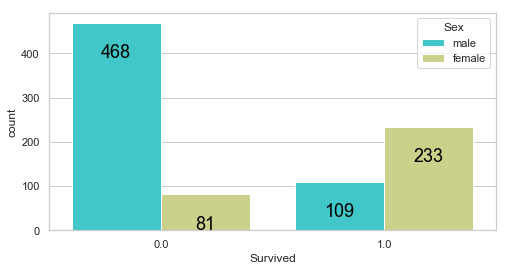

In [22]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived', data= td, hue= 'Sex', palette='rainbow')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=18)

This graph shows that %18 male passengers survived , while %74 female passengers survived. This means that the chance of surviving of women is almost 4 times more than chance of surviving of men.

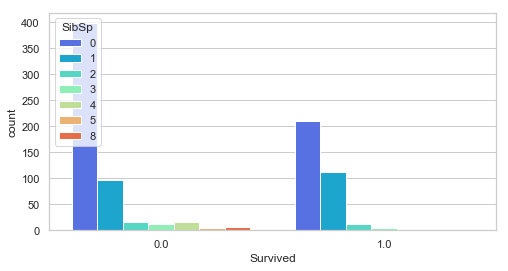

In [23]:
#siblings or spouses
sns.set_style('whitegrid')
sns.countplot(x='Survived', data= td, hue= 'SibSp', palette='rainbow')

This graph shows that the chance of surviving for who had 1 or 2 siblings or spouses is higher than the other categories

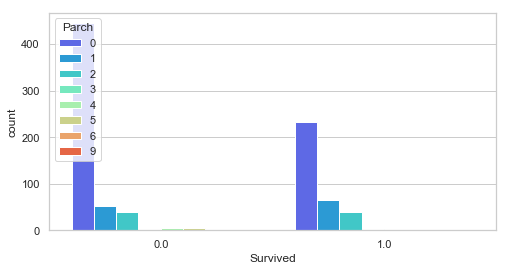

In [24]:
#Parent or Child
sns.set_style('whitegrid')
sns.countplot(x='Survived', data= td, hue= 'Parch', palette='rainbow')

This graph shows that the chance of surviving for who had 1 or 2 Parent or Child is higher than the other categories
Let's make another new feature as 'Family' to explore more:

In [25]:
#add a field as family which is sum of SibSp + Parent or child (Parch)
td['Family'] = td.Parch + td.SibSp

In [26]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


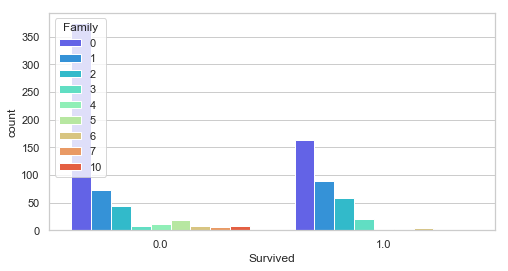

In [27]:
#Family
sns.set_style('whitegrid')
sns.countplot(x='Survived', data= td, hue= 'Family', palette='rainbow')

As we see if passenger had 1, 2 or 3 person in 'Family' feature , it increases the chance of surviving more than the other gategories.

C:\Anaconda3-2019\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


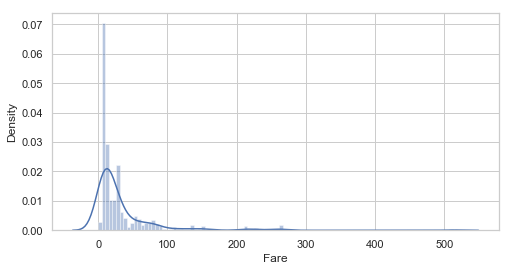

In [28]:
#histogram of Fare
sns.distplot((td.Fare), bins=100)

In [29]:
print(td.Fare.min())
print(td.Fare.max())

0.0
512.3292


it is better to categories this feature.as we see in the above graph, most of the prices are in range of (0 , 100), we should care of them.

In [30]:
#make 9 categories of Frae amount
td['Fare_Category'] = pd.cut(td['Fare'], bins=[-1,15,30,45,60,80,100,200,300,515], labels=[1,2,3,4,5,6,7,8,9])

In [31]:
td.Fare_Category.isnull().sum()

1

Now we fill 1 missing value with mode of 'Fare_Category':

In [32]:
# fill missing values with mode of values
td['Fare_Category'].fillna(td.Fare_Category.mode()[0], inplace=True)

In [33]:
td.Fare_Category.isnull().sum()

0

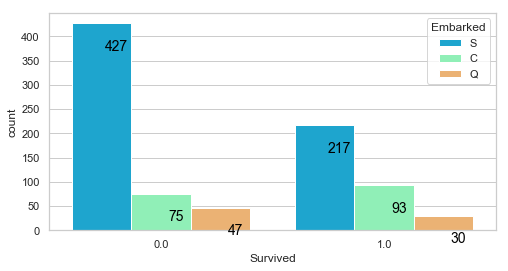

In [34]:
#Embarked
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived', data= td, hue= 'Embarked', palette='rainbow')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=14)

This graph shows that passengers who entred on board from port 'C' , had more chance of surviving than the others.
Now we should categorize this feature and remove eith it's 2 missing value:

In [35]:
#Embarked , missing values replace by most frequency : 'S'
td.Embarked.fillna(td.Embarked.mode()[0], inplace = True)
td['Embarked'].isnull().sum()

0

In [36]:
td[['embarked']] = td[['Embarked']].apply(lambda col:pd.Categorical(col).codes)

Let's make a new feature again , as 'Male' , that shows : 1 -> if the passenger is male and 0 -> if it is female:

In [37]:
td['male'] = pd.get_dummies(td['Sex'], drop_first=True)

In [38]:
td.male.isnull().sum()

0

In [39]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,embarked,male
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,2,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,5,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,2,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,4,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,2,1


Now we should replace 'Age' field missing values. we use median in each class category:

In [40]:
#Age missing value, using median of Age in each Pclass
td.groupby('Pclass')['Age'].median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [41]:
#function used to impute 'Age' field
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [42]:
td['Age'] = td[['Age', 'Pclass']].apply(impute_age, axis =1)

In [43]:
td['Age'].isnull().sum()

0

In [44]:
td.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            0
Family              0
Fare_Category       0
embarked            0
male                0
dtype: int64

We will omit 'Fare' and 'Cabin' fields , so their misiing values are not important.

In [45]:
print(td.Age.min())
print(td.Age.max())

0.17
80.0


We can make 'Age' field a new categorical feature as : 'Age_Cat'

In [46]:
#make category to Age
#every 10 years
bins= [0,10,20,30,40,50,60,70,81]
labels = [1,2,3,4,5,6,7,8]
td['Age_Cat'] = pd.cut(td['Age'], bins=bins, labels=labels, right=False)

In [47]:
td.Age_Cat.isnull().sum()

0

In [48]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,embarked,male,Age_Cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,2,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,5,0,0,4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,2,0,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,4,2,0,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,2,1,4


In [49]:
#finding indexes of rows that "Survived" is null
df = td.copy()
df[df['Survived'].isnull()].index.tolist()

[891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 984,
 985,
 986,
 987,
 988,
 989,
 990,
 991,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 999,
 1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 10

In [50]:
#split again data set into 2 dataset as train_data , test_data for prediction and making submission file:
train_data = td.iloc[:891,:]
test_data = td.iloc[891:,:]

In [51]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,embarked,male,Age_Cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,2,1,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,5,0,0,4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,2,0,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,4,2,0,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,2,1,4
5,6,0.0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q,0,1,1,1,3
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,4,2,1,6
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,2,2,1,1
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,1,2,0,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,3,0,0,2


In [52]:
test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,embarked,male,Age_Cat
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,1,1,4
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1,2,0,5
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,1,1,7
894,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,2,1,3
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,1,2,0,3
896,897,NaN,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,1,2,1,2
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,1,1,0,4
898,899,NaN,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,2,2,2,1,3
899,900,NaN,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0,1,0,0,2
900,901,NaN,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,2,2,2,1,3


Now we should omit the features that we dont need for prediction on both data sets train_data & test_data

In [53]:
# PassengerId , Name, Sex, Age SibSp, Parch, Ticket, Fare, Cabin, Embarked
train_data.drop(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1,inplace=True)
train_data.head()

C:\Anaconda3-2019\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Survived,Pclass,Family,Fare_Category,embarked,male,Age_Cat
0,0.0,3,1,1,2,1,3
1,1.0,1,1,5,0,0,4
2,1.0,3,0,1,2,0,3
3,1.0,1,1,4,2,0,4
4,0.0,3,0,1,2,1,4


In [54]:
# Name, Sex, Age SibSp, Parch, Ticket, Fare, Cabin, Embarked
test_data.drop(['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1,inplace=True)
test_data.head()

,PassengerId,Survived,Pclass,Family,Fare_Category,embarked,male,Age_Cat
891,892,NaN,3,0,1,1,1,4
892,893,NaN,3,1,1,2,0,5
893,894,NaN,2,0,1,1,1,7
894,895,NaN,3,0,1,2,1,3
895,896,NaN,3,2,1,2,0,3


# Final section : Prediction

In [55]:
# train,test,split and evaluate models on train_data , then make the best into y_test prediction
X = train_data.iloc[:, [1,2,3,4,5,6]]
y = train_data.iloc[:, [0]]
x_tr, x_ev, y_tr, y_ev = train_test_split(X, y, test_size= 0.2, random_state= 99)

In [56]:
#Gaussian Naive Bays algorithm to test and evaluate
GNB_test = GaussianNB()
GNB_test.fit(x_tr,np.ravel(y_tr))

C:\Anaconda3-2019\lib\site-packages\sklearn\utils\validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


GaussianNB()

In [57]:
#predict on x evaluate to gain accuracy of the GNB model
pred_test = GNB_test.predict(x_ev)

C:\Anaconda3-2019\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [58]:
#classification report and accuracy of the model

print(classification_report(y_ev, pred_test))
print("GNB Accuracy: "+repr(round(GNB_test.score(x_ev, y_ev) * 100, 2)) + "%")

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       113
         1.0       0.64      0.70      0.67        66

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.75      0.74      0.75       179

GNB Accuracy: 74.3%


C:\Anaconda3-2019\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [59]:
#training and predicting by Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(x_tr, y_tr)

C:\Anaconda3-2019\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [60]:
prediction = logmodel.predict(x_ev)

C:\Anaconda3-2019\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [61]:
print(classification_report(y_ev, prediction))
print(confusion_matrix(y_ev, prediction))
print("LogisticRegression Accuracy: "+repr(round(logmodel.score(x_ev, y_ev) * 100, 2)) + "%")

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       113
         1.0       0.70      0.64      0.67        66

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.77      0.76       179

[[95 18]
 [24 42]]
LogisticRegression Accuracy: 76.54%


C:\Anaconda3-2019\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [62]:
# model on RandomForrestClassifier Algorithm
rfc = RandomForestClassifier(criterion='gini', n_estimators= 700, min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

In [63]:
#fit model
rfc.fit(x_tr, y_tr)

C:\Anaconda3-2019\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [64]:
#predict
pred_rfc = rfc.predict(x_ev)

In [65]:
print(classification_report(y_ev, pred_rfc))
print(confusion_matrix(y_ev, pred_rfc))
print("RandomForrestClassifier Accuracy: "+repr(round(rfc.score(x_ev, y_ev) * 100, 2)) + "%")

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       113
         1.0       0.80      0.71      0.75        66

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

[[101  12]
 [ 19  47]]
RandomForrestClassifier Accuracy: 82.68%


As we can see the best model is made by the Random Forrest Classifier algorithm, so we take this model and make final submission file:

In [66]:
X_train = train_data.iloc[:, [1,2,3,4,5,6]]
X_train.head()

,Pclass,Family,Fare_Category,embarked,male,Age_Cat
0,3,1,1,2,1,3
1,1,1,5,0,0,4
2,3,0,1,2,0,3
3,1,1,4,2,0,4
4,3,0,1,2,1,4


In [67]:
y_train = train_data.iloc[:, [0]]
y_train.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [68]:
X_test = test_data.iloc[:, [2,3,4,5,6,7]]
X_test.head()

,Pclass,Family,Fare_Category,embarked,male,Age_Cat
891,3,0,1,1,1,4
892,3,1,1,2,0,5
893,2,0,1,1,1,7
894,3,0,1,2,1,3
895,3,2,1,2,0,3


In [69]:
y_test = test_data.iloc[:, [0,1]]
y_test.head()

,PassengerId,Survived
891,892,NaN
892,893,NaN
893,894,NaN
894,895,NaN
895,896,NaN


In [70]:
#Using the best model above , Random Forrest Classification , which has better accuracy
#fit model
rfc.fit(X_train, y_train)

C:\Anaconda3-2019\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [71]:
#prediction

final_prediction = rfc.predict(X_test)

In [76]:
final_prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [77]:
y_test['Survived'] = final_prediction

C:\Anaconda3-2019\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
y_test

,PassengerId,Survived
891,892,0.0
892,893,0.0
893,894,0.0
894,895,0.0
895,896,0.0
896,897,0.0
897,898,0.0
898,899,0.0
899,900,1.0
900,901,0.0


We made our model and insert all the predictions into 'Survived' field.Now we make the '.csv' submission file:

In [108]:
Titanic_submission_data = y_test

In [109]:

Titanic_submission_data['Survived'] = Titanic_submission_data['Survived'].astype('int')

C:\Anaconda3-2019\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
Titanic_submission_data

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
896,897,0
897,898,0
898,899,0
899,900,1
900,901,0


In [111]:
Titanic_submission_data.to_csv(r'C:\Users\aryan computer\Desktop\jupyter\Titanic ML Disaster\Titanic_ML\Titanic_submission_data.csv', sep=',', index= False)

In [112]:
data_check = pd.read_csv(r'C:\Users\aryan computer\Desktop\jupyter\Titanic ML Disaster\Titanic_ML\Titanic_submission_data.csv')

In [113]:
data_check

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
